In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

In [2]:
#Read in Excel Spreadsheets
xls1 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KATL_SampleSize.xlsx')
xls2 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KBUF_SampleSize.xlsx')
xls3 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KCDC_SampleSize.xlsx')
xls4 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KCNK_SampleSize.xlsx')
xls5 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KEYW_SampleSize.xlsx')
xls6 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KGFK_SampleSize.xlsx')
xls7 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KLAX_SampleSize.xlsx')
xls8 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KLFT_SampleSize.xlsx')
xls9 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KLND_SampleSize.xlsx')
xls10 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KMDH_SampleSize.xlsx')
xls11 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KMKE_SampleSize.xlsx')
xls12 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KMSN_SampleSize.xlsx')
xls13 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KPVD_SampleSize.xlsx')
xls14 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KROW_SampleSize.xlsx')
xls15 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KSFF_SampleSize.xlsx')
xls16 = pd.ExcelFile(r'C:\Users\vlang\Desktop\Gust SampleSize\KSLE_SampleSize.xlsx')

KeyboardInterrupt: 

In [ ]:
#Read in specific wx type from excel spreadsheets
df1= pd.read_excel(xls1, 'Windy Snow')
df2= pd.read_excel(xls2, 'Windy Snow')
df3= pd.read_excel(xls3, 'Windy Snow')
df4= pd.read_excel(xls4, 'Windy Snow')
df5= pd.read_excel(xls5, 'Windy Snow')
df6= pd.read_excel(xls6, 'Windy Snow')
df7= pd.read_excel(xls7, 'Windy Snow')
df8= pd.read_excel(xls8, 'Windy Snow')
df9= pd.read_excel(xls9, 'Windy Snow')
df10= pd.read_excel(xls10, 'Windy Snow')
df11= pd.read_excel(xls11, 'Windy Snow')
df12= pd.read_excel(xls12, 'Windy Snow')
df13= pd.read_excel(xls13, 'Windy Snow')
df14= pd.read_excel(xls14, 'Windy Snow')
df15= pd.read_excel(xls15, 'Windy Snow')
df16= pd.read_excel(xls16, 'Windy Snow')

In [ ]:
#set up dataeframe, list of models and forecast projections
dummy = pd.DataFrame({'Model':[], 'Forecast Projection (hr)':[],'Sample Size': [], 'CL Abs Mean':[], 'PP abs Mean':[],
                     'Mean Absolute Error (kt)':[], 'Model vs CL Abs Bias Sign Test t-test':[]})
Asos = pd.DataFrame({'PProg':[], 'CL':[]}) #'NAM-All':[], 'NAM-19':[], 'GFS-All':[], 'GFS-19':[]})
namall=pd.DataFrame({'Model':[], 'Forecast Projection (hr)':[],'Sample Size': [], 'CL Abs Mean':[], 'PP abs Mean':[],
                     'Mean Absolute Error (kt)':[], 'Model vs CL Abs Bias Sign Test t-test':[]})
gfsall=pd.DataFrame({'Model':[], 'Forecast Projection (hr)':[],'Sample Size': [], 'CL Abs Mean':[], 'PP abs Mean':[],
                     'Mean Absolute Error (kt)':[], 'Model vs CL Abs Bias Sign Test t-test':[]})
nam19 =pd.DataFrame({'Model':[], 'Forecast Projection (hr)':[],'Sample Size': [], 'CL Abs Mean':[], 'PP abs Mean':[],
                     'Mean Absolute Error (kt)':[], 'Model vs CL Abs Bias Sign Test t-test':[]})
gfs19 =pd.DataFrame({'Model':[], 'Forecast Projection (hr)':[],'Sample Size': [], 'CL Abs Mean':[], 'PP abs Mean':[],
                     'Mean Absolute Error (kt)':[], 'Model vs CL Abs Bias Sign Test t-test':[]})
pers =pd.DataFrame({'Model':[], 'Forecast Projection (hr)':[],'Sample Size': [], 'CL Abs Mean':[], 'PP abs Mean':[],
                     'Mean Absolute Error (kt)':[], 'Model vs CL Abs Bias Sign Test t-test':[]})
pers19 =pd.DataFrame({'Model':[], 'Forecast Projection (hr)':[],'Sample Size': [], 'CL Abs Mean':[], 'PP abs Mean':[],
                     'Mean Absolute Error (kt)':[], 'Model vs CL Abs Bias Sign Test t-test':[]})

models = ['N06abs', 'N09abs', 'N12abs','N15abs', 'N18abs', 'N21abs','N24abs', 'N27abs', 'N30abs','N33abs',
          'N36abs', 'N39abs','N42abs', 'N45abs', 'N48abs','N51abs', 'N54abs', 'N57abs','N60abs', 'N66abs',
          'N72abs']
gfs_models=['G06abs', 'G09abs', 'G12abs','G15abs', 'G18abs', 'G21abs','G24abs', 'G27abs', 'G30abs','G33abs',
          'G36abs', 'G39abs','G42abs', 'G45abs', 'G48abs','G51abs', 'G54abs', 'G57abs','G60abs', 'G66abs',
          'G72abs']
proj = [6,9,12, 15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,66,72]

pers_models = ['P01abs', 'P02abs', 'P03abs','P04abs', 'P05abs', 'P06abs']
pers_proj = [1,2,3,4,5,6]

In [ ]:
#Function to calc sample size, CL mean, PProg mean, model mean, and sign test T value.
def modelrun(df): 
    for k in range(0, len(models)):
        #Finding Means
        model = 'NAM'
        sample=(df[(df[models[k]] != 999) & (df['CLbia'] !=999 ) & (df['PPbias']!=999)])['CLbia'].count()
        CLabsMean =(df[(df[models[k]] != 999) & (df['CLbia'] !=999 ) & (df['PPbias']!=999)])['CLabs'].mean()
        PPabsMean =(df[(df[models[k]] != 999) & (df['CLbia'] !=999 ) & (df['PPbias']!=999)])['PPabs'].mean()
        modelmean =(df[(df[models[k]] != 999) & (df['CLbia'] !=999 ) & (df['PPbias']!=999)])[models[k]].mean()
        projection= proj[k]
 
        #SignTest    
        df['Model-CL Abs'] = np.where(df[models[k]] != 999, df[models[k]]- df['CLabs'], np.nan)
        pos1 = np.sum(df['Model-CL Abs'] > 0)
        neg1 = np.sum(df['Model-CL Abs'] < 0)
        t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
        dummy.loc[len(dummy.index)]=(model,projection, sample,CLabsMean,PPabsMean, modelmean,t1)
        namall.loc[len(namall.index)]=(model,projection, sample,CLabsMean,PPabsMean, modelmean,t1)
                                                                                          
        #GFS
        model = 'GFS'
        sample=(df[(df[gfs_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['PPbias']!=999)])['CLbia'].count()
        CLabsMean =(df[(df[gfs_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['PPbias']!=999)])['CLabs'].mean()
        PPabsMean =(df[(df[gfs_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['PPbias']!=999)])['PPabs'].mean()
        modelmean =(df[(df[gfs_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['PPbias']!=999)])[gfs_models[k]].mean()
        projection= proj[k]
        #SignTest    
        df['Model-CL Abs'] = np.where(df[gfs_models[k]] != 999, df[gfs_models[k]]- df['CLabs'], np.nan)
        pos1 = np.sum(df['Model-CL Abs'] > 0)
        neg1 = np.sum(df['Model-CL Abs'] < 0)
        t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
        dummy.loc[len(dummy.index)]=(model,projection, sample,CLabsMean,PPabsMean, modelmean,t1)
        gfsall.loc[len(gfsall.index)]=(model,projection, sample,CLabsMean,PPabsMean, modelmean,t1)
        
        #Model-19
        model = 'NAM-19'
        sample= df.loc[(df[models[k]] != 999) & (df['CLbia'] !=999 ) & (df['ASOSspd']>19), 'CLbia'].count()
        CLabsMean= df.loc[(df[models[k]] != 999) & (df['CLbia'] !=999 ) & (df['ASOSspd']>19), 'CLabs'].mean()
        PPabsMean= df.loc[(df[models[k]] != 999) & (df['CLbia'] !=999 ) & (df['ASOSspd']>19), 'PPabs'].mean()
        modelmean= df.loc[(df[models[k]] != 999) & (df['CLbia'] !=999 ) & (df['ASOSspd']>19), models[k]].mean()
        projection= proj[k]
        #SignTest    
        df['Model-CL Abs'] = np.where(df[models[k]] != 999, df[models[k]]- df['CLabs'], np.nan)
        pos1 = np.sum(df['Model-CL Abs'] > 0)
        neg1 = np.sum(df['Model-CL Abs'] < 0)
        t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
        dummy.loc[len(dummy.index)]=(model,projection, sample,CLabsMean,PPabsMean, modelmean,t1)
        nam19.loc[len(nam19.index)]=(model,projection, sample,CLabsMean,PPabsMean, modelmean,t1)
             
        model = 'GFS-19'
        sample= df.loc[(df[gfs_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['ASOSspd']>19), 'CLbia'].count()
        CLabsMean= df.loc[(df[gfs_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['ASOSspd']>19), 'CLabs'].mean()
        PPabsMean= df.loc[(df[gfs_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['ASOSspd']>19), 'PPabs'].mean()
        modelmean= df.loc[(df[gfs_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['ASOSspd']>19), gfs_models[k]].mean()
        projection= proj[k]
        #SignTest    
        df['Model-CL Abs'] = np.where(df[gfs_models[k]] != 999, df[gfs_models[k]]- df['CLabs'], np.nan)
        pos1 = np.sum(df['Model-CL Abs'] > 0)
        neg1 = np.sum(df['Model-CL Abs'] < 0)
        t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
        dummy.loc[len(dummy.index)]=(model,projection, sample,CLabsMean,PPabsMean, modelmean,t1)
        gfs19.loc[len(gfs19.index)]=(model,projection, sample,CLabsMean,PPabsMean, modelmean,t1)                                                                                        
    
                   
    Asos.loc[len(Asos.index)]=([df['PPabs'].mean(), df['CLabs'].mean()])            
    return(dummy)


In [ ]:
#Function to calc persistence sample size, CL mean, PProg mean, model mean, and sign test T value.
def modelrun_pers(df): 
    for k in range(0, len(pers_models)):  
        #Persistence
        model = 'Pers'
        sample=(df[(df[pers_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['PPbias']!=999)])['CLbia'].count()
        CLabsMean =(df[(df[pers_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['PPbias']!=999)])['CLabs'].mean()
        PPabsMean =(df[(df[pers_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['PPbias']!=999)])['PPabs'].mean()
        modelmean =(df[(df[pers_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['PPbias']!=999)])[pers_models[k]].mean()
        projection= pers_proj[k]
        
        #SignTest    
        df['Model-CL Abs'] = np.where(df[pers_models[k]] != 999, df[pers_models[k]]- df['CLabs'], np.nan)
        pos1 = np.sum(df['Model-CL Abs'] > 0)
        neg1 = np.sum(df['Model-CL Abs'] < 0)
        t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
        dummy.loc[len(dummy.index)]=(model,projection, sample,CLabsMean,PPabsMean, modelmean,t1)
        pers.loc[len(pers.index)]=(model,projection, sample,CLabsMean,PPabsMean, modelmean,t1)
        
        model = 'Pers-19'
        sample= df.loc[(df[pers_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['ASOSspd']>19), 'CLbia'].count()
        CLabsMean= df.loc[(df[pers_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['ASOSspd']>19), 'CLabs'].mean()
        PPabsMean= df.loc[(df[pers_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['ASOSspd']>19), 'PPabs'].mean()
        modelmean= df.loc[(df[pers_models[k]] != 999) & (df['CLbia'] !=999 ) & (df['ASOSspd']>19), pers_models[k]].mean()
        projection= pers_proj[k]
        
        #SignTest    
        df['Model-CL Abs'] = np.where(df[pers_models[k]] != 999, df[pers_models[k]]- df['CLabs'], np.nan)
        pos1 = np.sum(df['Model-CL Abs'] > 0)
        neg1 = np.sum(df['Model-CL Abs'] < 0)
        t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
        dummy.loc[len(dummy.index)]=(model,projection, sample,CLabsMean,PPabsMean, modelmean,t1)
        pers19.loc[len(pers19.index)]=(model,projection, sample,CLabsMean,PPabsMean, modelmean,t1)
                                                                                         
    return(dummy)             

In [ ]:
KATL.drop(KATL.index, inplace=True)
Asos.drop(Asos.index, inplace=True)
KBUF.drop(KBUF.index, inplace=True)
KCDC.drop(KCDC.index, inplace=True)
KCNK.drop(KCNK.index, inplace=True)
KEYW.drop(KEYW.index, inplace=True)
KGFK.drop(KGFK.index, inplace=True)
KLAX.drop(KLAX.index, inplace=True)
KLFT.drop(KLFT.index, inplace=True)
KLND.drop(KLND.index, inplace=True)
KMDH.drop(KMDH.index, inplace=True)
KMKE.drop(KMKE.index, inplace=True)
KMSN.drop(KMSN.index, inplace=True)
KPVD.drop(KPVD.index, inplace=True)
KROW.drop(KROW.index, inplace=True)
KSFF.drop(KSFF.index, inplace=True)
KSLE.drop(KSLE.index, inplace=True)

In [42]:
#Run each ASOS through function for NAM and GFS
KATL = modelrun(df1)
KATL= KATL[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KBUF = modelrun(df2)
KBUF= KBUF[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KCDC = modelrun(df3)
KCDC= KCDC[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KCNK = modelrun(df4)
KCNK= KCNK[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KEYW = modelrun(df5)
KEYW= KEYW[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KGFK = modelrun(df6)
KGFK= KGFK[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KLAX = modelrun(df7)
KLAX= KLAX[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KLFT = modelrun(df8)
KLFT= KLFT[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KLND = modelrun(df9)
KLND= KLND[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KMDH = modelrun(df10)
KMDH= KMDH[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KMKE = modelrun(df11)
KMKE= KMKE[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KMSN = modelrun(df12)
KMSN= KMSN[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KPVD = modelrun(df13)
KPVD= KPVD[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KROW = modelrun(df14)
KROW= KROW[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KSFF = modelrun(df15)
KSFF= KSFF[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KSLE = modelrun(df16)
KSLE= KSLE[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)


<ipython-input-39-49bbdf14eb3b>:16: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:31: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:46: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:60: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:16: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:31: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:46: RuntimeWarning: invalid value encountere

<ipython-input-39-49bbdf14eb3b>:16: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:31: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:46: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:60: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:16: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:31: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:46: RuntimeWarning: invalid value encountere

<ipython-input-39-49bbdf14eb3b>:16: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-39-49bbdf14eb3b>:46: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)


In [43]:
#with pd.ExcelWriter('C:/Users/vlang/Documents/Table3lesswind.xlsx', engine = 'xlsxwriter') as writer:    
#   Asos.to_excel(writer, sheet_name = 'Conv')

In [44]:
#set condition for sample size greater than 100 
KATL = KATL[KATL['Sample Size'] >=100]
KBUF = KBUF[KBUF['Sample Size'] >=100]
KCDC = KCDC[KCDC['Sample Size'] >=100]
KCNK = KCNK[KCNK['Sample Size'] >=100]
KEYW = KEYW[KEYW['Sample Size'] >=100]
KGFK = KGFK[KGFK['Sample Size'] >=100]
KLAX = KLAX[KLAX['Sample Size'] >=100]
KLFT = KLFT[KLFT['Sample Size'] >=100]
KLND = KLND[KLND['Sample Size'] >=100]
KMDH = KMDH[KMDH['Sample Size'] >=100]
KMKE = KMKE[KMKE['Sample Size'] >=100]
KMSN = KMSN[KMSN['Sample Size'] >=100]
KPVD = KPVD[KPVD['Sample Size'] >=100]
KROW = KROW[KROW['Sample Size'] >=100]
KSFF = KSFF[KSFF['Sample Size'] >=100]
KSLE = KSLE[KSLE['Sample Size'] >=100]

#Save to new exceal
with pd.ExcelWriter('C:/Users/vlang/Documents/Conv_MeanError.xlsx', engine = 'xlsxwriter') as writer:    
    KATL.to_excel(writer, sheet_name = 'KATL')
    KBUF.to_excel(writer, sheet_name = 'KBUF')
    KCDC.to_excel(writer, sheet_name = 'KCDC')
    KCNK.to_excel(writer, sheet_name = 'KCNK')
    KEYW.to_excel(writer, sheet_name = 'KEYW')
    KGFK.to_excel(writer, sheet_name = 'KGFK')
    KLAX.to_excel(writer, sheet_name = 'KLAX')
    KLFT.to_excel(writer, sheet_name = 'KLFT')
    KLND.to_excel(writer, sheet_name = 'KLND')
    KMDH.to_excel(writer, sheet_name = 'KMDH')
    KMKE.to_excel(writer, sheet_name = 'KMKE')
    KMSN.to_excel(writer, sheet_name = 'KMSN')
    KPVD.to_excel(writer, sheet_name = 'KPVD')
    KROW.to_excel(writer, sheet_name = 'KROW')
    KSFF.to_excel(writer, sheet_name = 'KSFF')
    KSLE.to_excel(writer, sheet_name = 'KSLE')

In [45]:
dataframes= [KATL, KBUF, KCDC, KCNK, KEYW, KGFK, KLAX, KLFT, KLND,KMDH, KMKE, KMSN, KPVD, KROW, KSFF, KSLE]
clabs= []
ppabs= []

#Quality check 
for i in range(len(dataframes)):
    #dataframes = dataframes[dataframes['Sample Size'] >= 100]
    clab =(dataframes[i]['CL Abs Mean']).mean()
    ppab =(dataframes[i]['PP abs Mean']).mean()
    clabs.append(clab)
    ppabs.append(ppab)
ppabs    

[nan,
 1.3840034579934306,
 nan,
 nan,
 nan,
 2.1033010022735916,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [46]:
clabs

[nan,
 6.162304378174047,
 nan,
 nan,
 nan,
 17.04642807377338,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [299]:
for i in range(len(dataframes)):
    for df in dataframes:
        if (len(df)<=0):           
            df.loc[len(df.index)]=('Nam',6,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',6,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',9,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',9,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',12,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',12,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',12,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',15,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',15,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',18,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',18,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',21,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',21,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',24,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',24,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',27,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',27,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',30,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',30,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',33,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',33,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',36,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',36,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',39,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',39,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',42,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',42,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',45,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',45,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',48,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',48,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',51,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',51,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',54,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',54,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',57,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',57,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',60,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',60,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',66,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',66,0,0,0,0,0)
            df.loc[len(df.index)]=('GFS',72,0,0,0,0,0)
            df.loc[len(df.index)]=('Nam',72,0,0,0,0,0)


In [300]:
KSLE.shape

(42, 7)

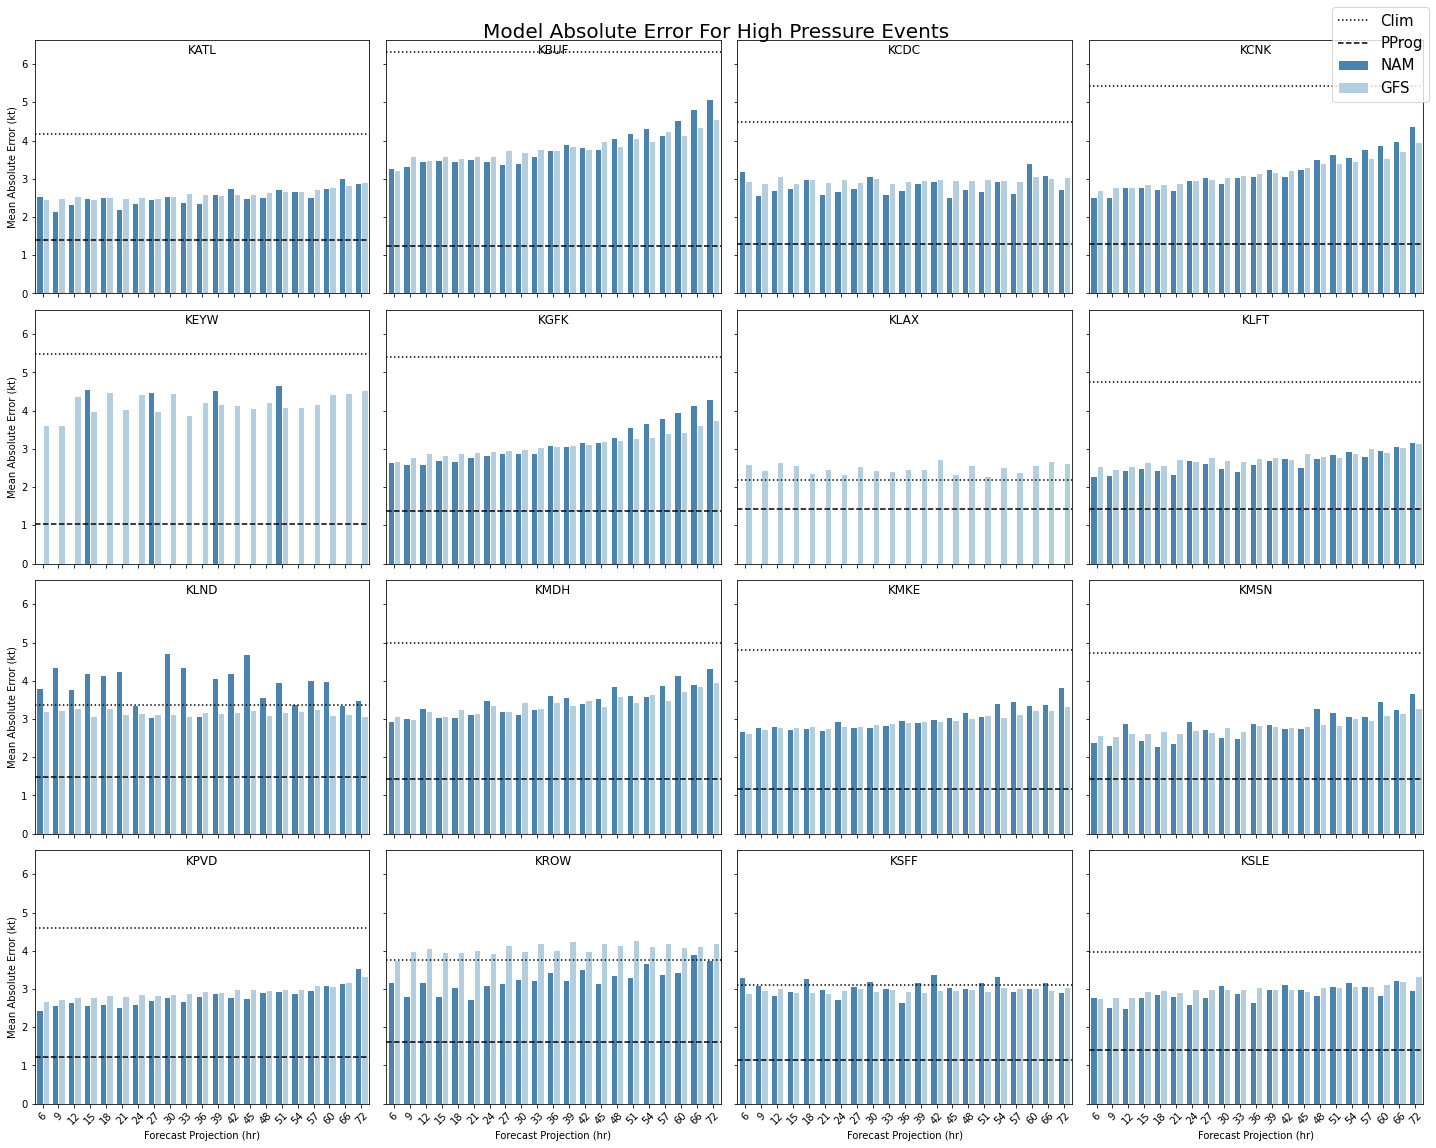

In [301]:
#df_concat = pd.concat((df1, df2, df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16))
#(KATL['CLabs']).mean()
#clabs =(df_concat['CLabs']).mean()
#ppabs =(df_concat['PPabs']).mean()

#NAM vs NAM19 Graphs  palette=['#432371',"#FAAE7B"]
hue_order= ['NAM', 'GFS']

ax_1= 14
fig, axes = plt.subplots(4, 4, sharey=True,  sharex=True,figsize=(20,16)) #Set up subplot axes
fig.suptitle('Model Absolute Error For High Pressure Events',fontsize=20,)

ax1=sns.barplot(ax=axes[0, 0], data=KATL, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None, palette= ("Blues_r"),
                hue="Model", hue_order= hue_order, edgecolor="white").set(xlabel=None)  
axes[0,0].axhline(y=clabs[0], color = 'black', linestyle = ':', label= 'Clim')
axes[0,0].axhline(y=ppabs[0],color = 'black', linestyle = '--', label= 'PProg')
axes[0,0].set_title("KATL",y=1.0, pad=-14)
                     
ax2=sns.barplot(ax=axes[0, 1], data=KBUF, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Blues_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[0,1].axhline(y=clabs[1], color = 'black', linestyle = ':', label= 'Clim')
axes[0,1].axhline(y=ppabs[1],color = 'black', linestyle = '--', label= 'PProg')
axes[0, 1].set_title("KBUF",y=1.0, pad=-14)

ax3=sns.barplot(ax=axes[0, 2], data=KCDC, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Blues_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[0,2].axhline(y=clabs[2], color = 'black', linestyle = ':', label= 'Clim')
axes[0,2].axhline(y=ppabs[2], color = 'black', linestyle = '--', label= 'PProg')
axes[0,2].set_title("KCDC",y=1.0, pad=-14)

ax4=sns.barplot(ax=axes[0, 3], data=KCNK, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Blues_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[0,3].axhline(y=clabs[3], color = 'black', linestyle = ':', label= 'Clim')
axes[0,3].axhline(y=ppabs[2], color = 'black', linestyle = '--', label= 'PProg')
axes[0,3].set_title("KCNK",y=1.0, pad=-14)  

ax5,=sns.barplot(ax=axes[1, 0], data=KEYW, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Blues_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None) 
axes[1,0].axhline(y=clabs[4], color = 'black', linestyle = ':', label= 'Clim')
axes[1,0].axhline(y=ppabs[4],color = 'black', linestyle = '--', label= 'PProg')
axes[1, 0].set_title("KEYW",y=1.0, pad=-14)   

ax6=sns.barplot(ax=axes[1, 1], data=KGFK, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Blues_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[1,1].axhline(y=clabs[5], color = 'black', linestyle = ':', label= 'Clim')
axes[1,1].axhline(y=ppabs[5], color = 'black', linestyle = '--', label= 'PProg')
axes[1,1].set_title("KGFK",y=1.0, pad=-14)

ax7=sns.barplot(ax=axes[1, 2], data=KLAX, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Blues_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[1,2].axhline(y=clabs[6], color = 'black', linestyle = ':', label= 'Clim')
axes[1,2].axhline(y=ppabs[6], color = 'black', linestyle = '--', label= 'PProg')
axes[1,2].set_title("KLAX",y=1.0, pad=-14)

ax8=sns.barplot(ax=axes[1, 3], data=KLFT, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Blues_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[1,3].axhline(y=clabs[7], color = 'black', linestyle = ':', label= 'Clim')
axes[1,3].axhline(y=ppabs[6],color = 'black', linestyle = '--', label= 'PProg')
axes[1,3].set_title("KLFT",y=1.0, pad=-14)

ax9=sns.barplot(ax=axes[2, 0], data=KLND, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Blues_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None) 
axes[2,0].axhline(y=clabs[8], color = 'black', linestyle = ':', label= 'Clim')
axes[2,0].axhline(y=ppabs[8], color = 'black', linestyle = '--', label= 'PProg')
axes[2,0].set_title("KLND",y=1.0, pad=-14)

ax10=sns.barplot(ax=axes[2, 1], data=KMDH, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Blues_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None)
axes[2,1].axhline(y=clabs[9], color = 'black', linestyle = ':', label= 'Clim')
axes[2,1].axhline(y=ppabs[9],color = 'black', linestyle = '--', label= 'PProg')
axes[2,1].set_title("KMDH",y=1.0, pad=-14)

ax11=sns.barplot(ax=axes[2, 2], data=KMKE, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Blues_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[2,2].axhline(y=clabs[10], color = 'black', linestyle = ':', label= 'Clim')
axes[2,2].axhline(y=ppabs[10], color = 'black', linestyle = '--', label= 'PProg')
axes[2,2].set_title("KMKE",y=1.0, pad=-14)

ax12=sns.barplot(ax=axes[2, 3], data=KMSN, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Blues_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white") .set(xlabel=None, ylabel=None)  
axes[2,3].axhline(y=clabs[11], color = 'black', linestyle = ':', label= 'Clim')
axes[2,3].axhline(y=ppabs[11],color = 'black', linestyle = '--', label= 'PProg')
axes[2,3].set_title("KMSN",y=1.0, pad=-14)

ax13=sns.barplot(ax=axes[3, 0], data=KPVD, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Blues_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white") 
axes[3,0].axhline(y=clabs[12], color = 'black', linestyle = ':', label= 'Clim')
axes[3,0].axhline(y=ppabs[12], color = 'black', linestyle = '--', label= 'PProg')
axes[3,0].set_title("KPVD",y=1.0, pad=-14)

ax14=sns.barplot(ax=axes[3, 1], data=KROW, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Blues_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set(ylabel=None) 
axes[3,1].axhline(y=clabs[13], color = 'black', linestyle = ':', label= 'Clim')
axes[3,1].axhline(y=ppabs[13], color = 'black', linestyle = '--', label= 'PProg')
axes[3,1].set_title("KROW",y=1.0, pad=-14)

ax15=sns.barplot(ax=axes[3, 2], data=KSFF, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Blues_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set( ylabel=None)
axes[3,2].axhline(y=clabs[14],color = 'black', linestyle = ':', label= 'Clim')
axes[3,2].axhline(y=ppabs[14],color = 'black', linestyle = '--', label= 'PProg')

axes[3,2].set_title("KSFF",y=1.0, pad=-14)

ax16=sns.barplot(ax=axes[3, 3], data=KSLE, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Blues_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set( ylabel=None) 
axes[3,3].axhline(y=clabs[15], color = 'black', linestyle = ':', label= 'Clim')
axes[3,3].axhline(y=ppabs[15], color = 'black', linestyle = '--', label= 'PProg')

axes[3,3].set_title("KSLE",y=1.0, pad=-14)

#for c in axes:
#    for ax in c:
#        ax.get_legend().remove()
#        plt.xticks( rotation = 90, )

#for i in range(len(clabs)):
    #for ax in fig.axes:
        #ax.axhline(y=clabs[i],color = 'black', linestyle = ':', label= 'Clim')
        #ax.axhline(y=ppabs[i],color = 'black', linestyle = '--', label= 'PProg')
        
lines = []
labels = []
for ax in fig.axes:
    ax.get_legend().remove()
    ax.set_xticklabels(proj, rotation=45)
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
#ax14.set_xticklabels(proj, rotation=45, horizontalalignment='right')    
fig.tight_layout()
fig.legend(lines[0:4],labels[0:4], prop={'size':15})


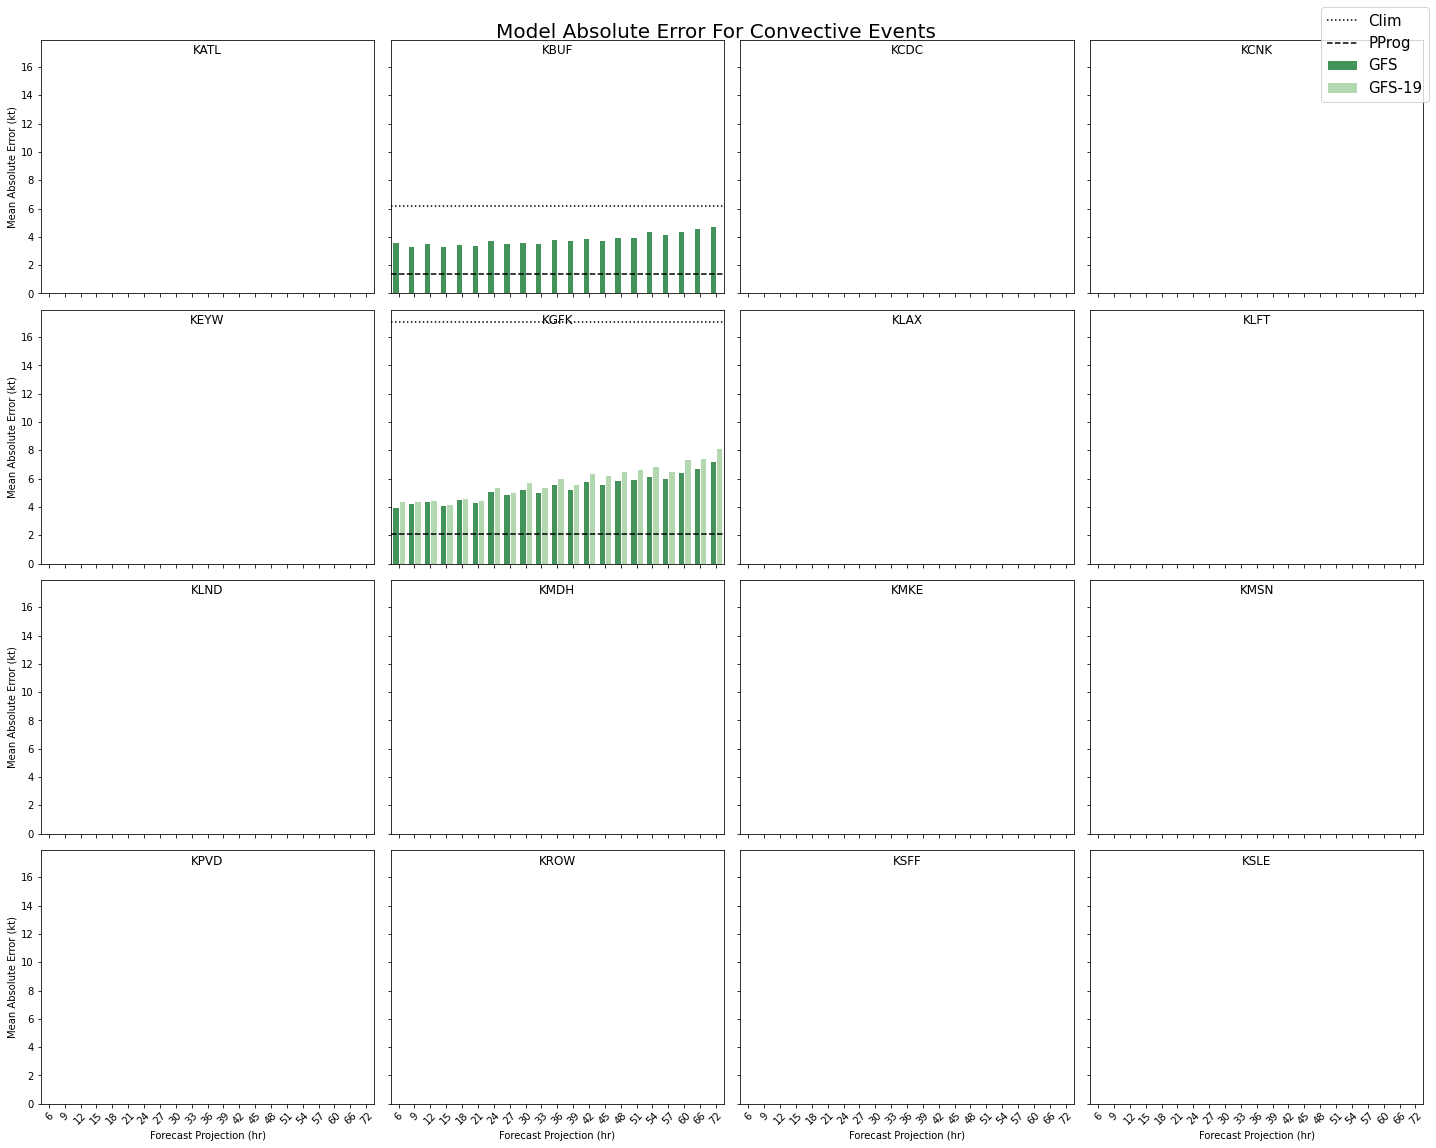

In [198]:
#Gfs & gfs19 Graphs 
hue_order= ['GFS', 'GFS-19']

ax_1= 14
fig, axes = plt.subplots(4, 4, sharey=True,  sharex=True,figsize=(20,16)) #Set up subplot axes
fig.suptitle('Model Absolute Error For Convective Events',fontsize=20,)

ax1=sns.barplot(ax=axes[0, 0], data=KATL, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None, palette= ("Greens_r"),
                hue="Model", hue_order= hue_order, edgecolor="white").set(xlabel=None)  
axes[0,0].axhline(y=clabs[0], color = 'black', linestyle = ':', label= 'Clim')
axes[0,0].axhline(y=ppabs[0],color = 'black', linestyle = '--', label= 'PProg')
axes[0,0].set_title("KATL",y=1.0, pad=-14)
                     
ax2=sns.barplot(ax=axes[0, 1], data=KBUF, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Greens_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[0,1].axhline(y=clabs[1], color = 'black', linestyle = ':', label= 'Clim')
axes[0,1].axhline(y=ppabs[1],color = 'black', linestyle = '--', label= 'PProg')
axes[0, 1].set_title("KBUF",y=1.0, pad=-14)

ax3=sns.barplot(ax=axes[0, 2], data=KCDC, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Greens_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[0,2].axhline(y=clabs[2], color = 'black', linestyle = ':', label= 'Clim')
axes[0,2].axhline(y=ppabs[2], color = 'black', linestyle = '--', label= 'PProg')
axes[0,2].set_title("KCDC",y=1.0, pad=-14)

ax4=sns.barplot(ax=axes[0, 3], data=KCNK, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Greens_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[0,3].axhline(y=clabs[3], color = 'black', linestyle = ':', label= 'Clim')
axes[0,3].axhline(y=ppabs[2], color = 'black', linestyle = '--', label= 'PProg')
axes[0,3].set_title("KCNK",y=1.0, pad=-14)  

ax5,=sns.barplot(ax=axes[1, 0], data=KEYW, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Greens_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None) 
axes[1,0].axhline(y=clabs[4], color = 'black', linestyle = ':', label= 'Clim')
axes[1,0].axhline(y=ppabs[4],color = 'black', linestyle = '--', label= 'PProg')
axes[1, 0].set_title("KEYW",y=1.0, pad=-14)   

ax6=sns.barplot(ax=axes[1, 1], data=KGFK, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Greens_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[1,1].axhline(y=clabs[5], color = 'black', linestyle = ':', label= 'Clim')
axes[1,1].axhline(y=ppabs[5], color = 'black', linestyle = '--', label= 'PProg')
axes[1,1].set_title("KGFK",y=1.0, pad=-14)

ax7=sns.barplot(ax=axes[1, 2], data=KLAX, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Greens_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[1,2].axhline(y=clabs[6], color = 'black', linestyle = ':', label= 'Clim')
axes[1,2].axhline(y=ppabs[6], color = 'black', linestyle = '--', label= 'PProg')
axes[1,2].set_title("KLAX",y=1.0, pad=-14)

ax8=sns.barplot(ax=axes[1, 3], data=KLFT, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Greens_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[1,3].axhline(y=clabs[7], color = 'black', linestyle = ':', label= 'Clim')
axes[1,3].axhline(y=ppabs[6],color = 'black', linestyle = '--', label= 'PProg')
axes[1,3].set_title("KLFT",y=1.0, pad=-14)

ax9=sns.barplot(ax=axes[2, 0], data=KLND, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Greens_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None) 
axes[2,0].axhline(y=clabs[8], color = 'black', linestyle = ':', label= 'Clim')
axes[2,0].axhline(y=ppabs[8], color = 'black', linestyle = '--', label= 'PProg')
axes[2,0].set_title("KLND",y=1.0, pad=-14)

ax10=sns.barplot(ax=axes[2, 1], data=KMDH, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Greens_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None)
axes[2,1].axhline(y=clabs[9], color = 'black', linestyle = ':', label= 'Clim')
axes[2,1].axhline(y=ppabs[9],color = 'black', linestyle = '--', label= 'PProg')
axes[2,1].set_title("KMDH",y=1.0, pad=-14)

ax11=sns.barplot(ax=axes[2, 2], data=KMKE, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Greens_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[2,2].axhline(y=clabs[10], color = 'black', linestyle = ':', label= 'Clim')
axes[2,2].axhline(y=ppabs[10], color = 'black', linestyle = '--', label= 'PProg')
axes[2,2].set_title("KMKE",y=1.0, pad=-14)

ax12=sns.barplot(ax=axes[2, 3], data=KMSN, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Greens_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white") .set(xlabel=None, ylabel=None)  
axes[2,3].axhline(y=clabs[11], color = 'black', linestyle = ':', label= 'Clim')
axes[2,3].axhline(y=ppabs[11],color = 'black', linestyle = '--', label= 'PProg')
axes[2,3].set_title("KMSN",y=1.0, pad=-14)

ax13=sns.barplot(ax=axes[3, 0], data=KPVD, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Greens_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white") 
axes[3,0].axhline(y=clabs[12], color = 'black', linestyle = ':', label= 'Clim')
axes[3,0].axhline(y=ppabs[12], color = 'black', linestyle = '--', label= 'PProg')
axes[3,0].set_title("KPVD",y=1.0, pad=-14)

ax14=sns.barplot(ax=axes[3, 1], data=KROW, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Greens_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set(ylabel=None) 
axes[3,1].axhline(y=clabs[13], color = 'black', linestyle = ':', label= 'Clim')
axes[3,1].axhline(y=ppabs[13], color = 'black', linestyle = '--', label= 'PProg')
axes[3,1].set_title("KROW",y=1.0, pad=-14)

ax15=sns.barplot(ax=axes[3, 2], data=KSFF, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Greens_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set( ylabel=None)
axes[3,2].axhline(y=clabs[14],color = 'black', linestyle = ':', label= 'Clim')
axes[3,2].axhline(y=ppabs[14],color = 'black', linestyle = '--', label= 'PProg')

axes[3,2].set_title("KSFF",y=1.0, pad=-14)

ax16=sns.barplot(ax=axes[3, 3], data=KSLE, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Greens_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set( ylabel=None) 
axes[3,3].axhline(y=clabs[15], color = 'black', linestyle = ':', label= 'Clim')
axes[3,3].axhline(y=ppabs[15], color = 'black', linestyle = '--', label= 'PProg')

axes[3,3].set_title("KSLE",y=1.0, pad=-14)


lines = []
labels = []
for ax in fig.axes:
    ax.get_legend().remove()
    ax.set_xticklabels(proj, rotation=45)
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
#ax14.set_xticklabels(proj, rotation=45, horizontalalignment='right')    
fig.tight_layout()
fig.legend(lines[0:4],labels[0:4], prop={'size':15})

In [22]:
KATL.drop(KATL.index, inplace=True)
KBUF.drop(KBUF.index, inplace=True)
KCDC.drop(KCDC.index, inplace=True)
KCNK.drop(KCNK.index, inplace=True)
KEYW.drop(KEYW.index, inplace=True)
KGFK.drop(KGFK.index, inplace=True)
KLAX.drop(KLAX.index, inplace=True)
KLFT.drop(KLFT.index, inplace=True)
KLND.drop(KLND.index, inplace=True)
KMDH.drop(KMDH.index, inplace=True)
KMKE.drop(KMKE.index, inplace=True)
KMSN.drop(KMSN.index, inplace=True)
KPVD.drop(KPVD.index, inplace=True)
KROW.drop(KROW.index, inplace=True)
KSFF.drop(KSFF.index, inplace=True)
KSLE.drop(KSLE.index, inplace=True)

In [48]:
#Run each ASOS through function for persistence 
KATLp = modelrun_pers(df1)
KATLp= KATLp[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KBUF = modelrun_pers(df2)
KBUF= KBUF[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KCDC = modelrun_pers(df3)
KCDC= KCDC[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KCNK = modelrun_pers(df4)
KCNK= KCNK[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KEYW = modelrun_pers(df5)
KEYW= KEYW[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KGFK = modelrun_pers(df6)
KGFK= KGFK[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KLAX = modelrun_pers(df7)
KLAX= KLAX[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KLFT = modelrun_pers(df8)
KLFT= KLFT[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KLND = modelrun_pers(df9)
KLND= KLND[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KMDH = modelrun_pers(df10)
KMDH= KMDH[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KMKE = modelrun_pers(df11)
KMKE= KMKE[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KMSN = modelrun_pers(df12)
KMSN= KMSN[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KPVD = modelrun_pers(df13)
KPVD= KPVD[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KROW = modelrun_pers(df14)
KROW= KROW[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KSFF = modelrun_pers(df15)
KSFF= KSFF[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]
dummy.drop(dummy.index, inplace=True)

KSLE = modelrun_pers(df16)
KSLE= KSLE[['Model', 'Forecast Projection (hr)','Sample Size', 'CL Abs Mean', 'PP abs Mean',
                     'Mean Absolute Error (kt)', 'Model vs CL Abs Bias Sign Test t-test']]

dummy.drop(dummy.index, inplace=True)


<ipython-input-40-697b39816b11>:15: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-40-697b39816b11>:30: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-40-697b39816b11>:15: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)
<ipython-input-40-697b39816b11>:30: RuntimeWarning: invalid value encountered in double_scalars
  t1= (pos1 -((pos1+neg1)*.5))/np.sqrt((pos1+neg1)*.5*.5)


In [49]:
#set condition for sample size greater than 100
KATLp = KATLp[KATLp['Sample Size'] >=100]
KBUF = KBUF[KBUF['Sample Size'] >=100]
KCDC = KCDC[KCDC['Sample Size'] >=100]
KCNK = KCNK[KCNK['Sample Size'] >=100]
KEYW = KEYW[KEYW['Sample Size'] >=100]
KGFK = KGFK[KGFK['Sample Size'] >=100]
KLAX = KLAX[KLAX['Sample Size'] >=100]
KLFT = KLFT[KLFT['Sample Size'] >=100]
KLND = KLND[KLND['Sample Size'] >=100]
KMDH = KMDH[KMDH['Sample Size'] >=100]
KMKE = KMKE[KMKE['Sample Size'] >=100]
KMSN = KMSN[KMSN['Sample Size'] >=100]
KPVD = KPVD[KPVD['Sample Size'] >=100]
KROW = KROW[KROW['Sample Size'] >=100]
KSFF = KSFF[KSFF['Sample Size'] >=100]
KSLE = KSLE[KSLE['Sample Size'] >=100]

#Save to new exceal
with pd.ExcelWriter('C:/Users/vlang/Documents/ConvPer_MeanError.xlsx', engine = 'xlsxwriter') as writer:    
    KATLp.to_excel(writer, sheet_name = 'KATL')
    KBUF.to_excel(writer, sheet_name = 'KBUF')
    KCDC.to_excel(writer, sheet_name = 'KCDC')
    KCNK.to_excel(writer, sheet_name = 'KCNK')
    KEYW.to_excel(writer, sheet_name = 'KEYW')
    KGFK.to_excel(writer, sheet_name = 'KGFK')
    KLAX.to_excel(writer, sheet_name = 'KLAX')
    KLFT.to_excel(writer, sheet_name = 'KLFT')
    KLND.to_excel(writer, sheet_name = 'KLND')
    KMDH.to_excel(writer, sheet_name = 'KMDH')
    KMKE.to_excel(writer, sheet_name = 'KMKE')
    KMSN.to_excel(writer, sheet_name = 'KMSN')
    KPVD.to_excel(writer, sheet_name = 'KPVD')
    KROW.to_excel(writer, sheet_name = 'KROW')
    KSFF.to_excel(writer, sheet_name = 'KSFF')
    KSLE.to_excel(writer, sheet_name = 'KSLE')

In [51]:
dataframes= [KATLp, KBUF, KCDC, KCNK, KEYW, KGFK, KLAX, KLFT, KLND,KMDH, KMKE, KMSN, KPVD, KROW, KSFF, KSLE]
for i in range(len(dataframes)):
    for df in dataframes:
        if (len(df)==0):           
            df.loc[len(df.index)]=('Pers',1,0,0,0,0,0)
            df.loc[len(df.index)]=('Pers',2,0,0,0,0,0)
            df.loc[len(df.index)]=('Pers',3,0,0,0,0,0)
            df.loc[len(df.index)]=('Pers',4,0,0,0,0,0)
            df.loc[len(df.index)]=('Pers',5,0,0,0,0,0)
            df.loc[len(df.index)]=('Pers',6,0,0,0,0,0)
            
#KATLp


#clabs= []
#ppabs= []

#for i in range(len(dataframes)):
    #dataframes = dataframes[dataframes['Sample Size'] >= 100]
#    clab =(dataframes[i]['CL Abs Mean']).mean()
#    ppab =(dataframes[i]['PP abs Mean']).mean()
#    clabs.append(clab)
#    ppabs.append(ppab)
#ppabs   

In [52]:
KATLp

,Model,Forecast Projection (hr),Sample Size,CL Abs Mean,PP abs Mean,Mean Absolute Error (kt),Model vs CL Abs Bias Sign Test t-test
0,Pers,1.0,0.0,0.0,0.0,0.0,0.0
1,Pers,2.0,0.0,0.0,0.0,0.0,0.0
2,Pers,3.0,0.0,0.0,0.0,0.0,0.0
3,Pers,4.0,0.0,0.0,0.0,0.0,0.0
4,Pers,5.0,0.0,0.0,0.0,0.0,0.0
5,Pers,6.0,0.0,0.0,0.0,0.0,0.0


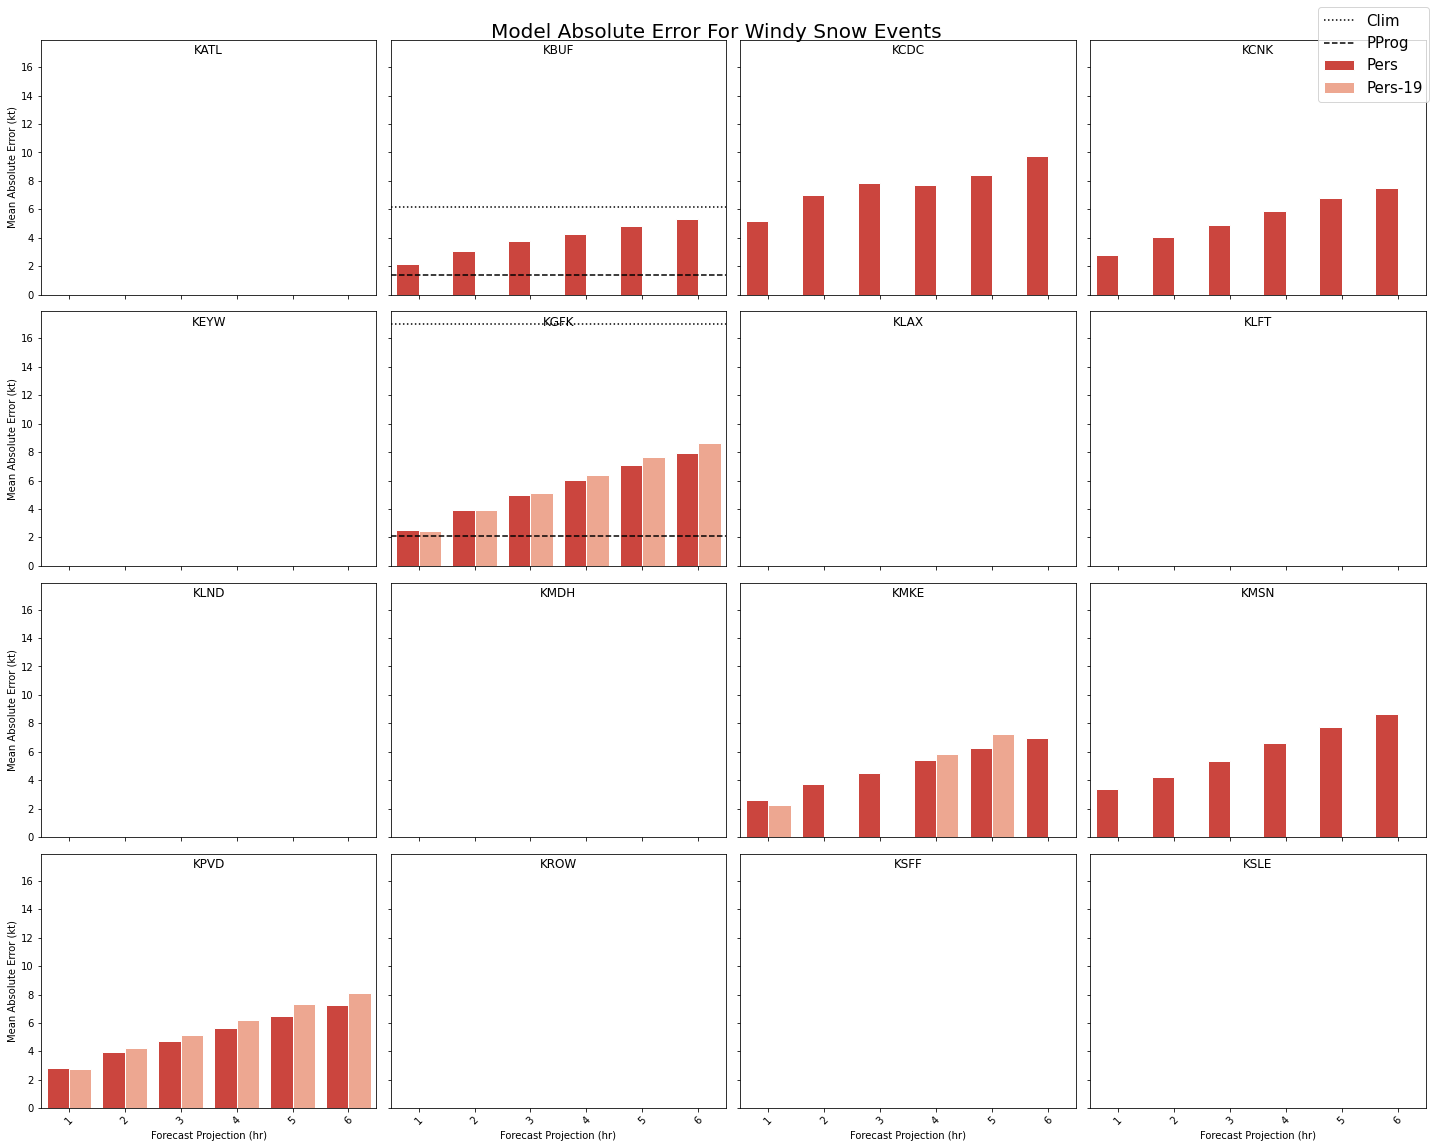

In [53]:
#PERs vs pers 19
hue_order= ['Pers', 'Pers-19']

ax_1= 14
fig, axes = plt.subplots(4, 4, sharey=True,  sharex=True,figsize=(20,16)) #Set up subplot axes
fig.suptitle('Model Absolute Error For Windy Snow Events',fontsize=20,)

ax1=sns.barplot(ax=axes[0, 0], data=KATLp, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None, palette= ("Reds_r"),
                hue="Model", hue_order= hue_order, edgecolor="white").set(xlabel=None)  
axes[0,0].axhline(y=clabs[0], color = 'black', linestyle = ':', label= 'Clim')
axes[0,0].axhline(y=ppabs[0],color = 'black', linestyle = '--', label= 'PProg')
axes[0,0].set_title("KATL",y=1.0, pad=-14)
                     
ax2=sns.barplot(ax=axes[0, 1], data=KBUF, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Reds_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[0,1].axhline(y=clabs[1], color = 'black', linestyle = ':', label= 'Clim')
axes[0,1].axhline(y=ppabs[1],color = 'black', linestyle = '--', label= 'PProg')
axes[0, 1].set_title("KBUF",y=1.0, pad=-14)

ax3=sns.barplot(ax=axes[0, 2], data=KCDC, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Reds_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[0,2].axhline(y=clabs[2], color = 'black', linestyle = ':', label= 'Clim')
axes[0,2].axhline(y=ppabs[2], color = 'black', linestyle = '--', label= 'PProg')
axes[0,2].set_title("KCDC",y=1.0, pad=-14)

ax4=sns.barplot(ax=axes[0, 3], data=KCNK, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Reds_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[0,3].axhline(y=clabs[3], color = 'black', linestyle = ':', label= 'Clim')
axes[0,3].axhline(y=ppabs[2], color = 'black', linestyle = '--', label= 'PProg')
axes[0,3].set_title("KCNK",y=1.0, pad=-14)  

ax5,=sns.barplot(ax=axes[1, 0], data=KEYW, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Reds_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None) 
axes[1,0].axhline(y=clabs[4], color = 'black', linestyle = ':', label= 'Clim')
axes[1,0].axhline(y=ppabs[4],color = 'black', linestyle = '--', label= 'PProg')
axes[1, 0].set_title("KEYW",y=1.0, pad=-14)   

ax6=sns.barplot(ax=axes[1, 1], data=KGFK, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Reds_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[1,1].axhline(y=clabs[5], color = 'black', linestyle = ':', label= 'Clim')
axes[1,1].axhline(y=ppabs[5], color = 'black', linestyle = '--', label= 'PProg')
axes[1,1].set_title("KGFK",y=1.0, pad=-14)

ax7=sns.barplot(ax=axes[1, 2], data=KLAX, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Reds_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[1,2].axhline(y=clabs[6], color = 'black', linestyle = ':', label= 'Clim')
axes[1,2].axhline(y=ppabs[6], color = 'black', linestyle = '--', label= 'PProg')
axes[1,2].set_title("KLAX",y=1.0, pad=-14)

ax8=sns.barplot(ax=axes[1, 3], data=KLFT, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Reds_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[1,3].axhline(y=clabs[7], color = 'black', linestyle = ':', label= 'Clim')
axes[1,3].axhline(y=ppabs[6],color = 'black', linestyle = '--', label= 'PProg')
axes[1,3].set_title("KLFT",y=1.0, pad=-14)

ax9=sns.barplot(ax=axes[2, 0], data=KLND, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Reds_r"),
                hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None) 
axes[2,0].axhline(y=clabs[8], color = 'black', linestyle = ':', label= 'Clim')
axes[2,0].axhline(y=ppabs[8], color = 'black', linestyle = '--', label= 'PProg')
axes[2,0].set_title("KLND",y=1.0, pad=-14)

ax10=sns.barplot(ax=axes[2, 1], data=KMDH, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Reds_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None)
axes[2,1].axhline(y=clabs[9], color = 'black', linestyle = ':', label= 'Clim')
axes[2,1].axhline(y=ppabs[9],color = 'black', linestyle = '--', label= 'PProg')
axes[2,1].set_title("KMDH",y=1.0, pad=-14)

ax11=sns.barplot(ax=axes[2, 2], data=KMKE, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Reds_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set(xlabel=None, ylabel=None) 
axes[2,2].axhline(y=clabs[10], color = 'black', linestyle = ':', label= 'Clim')
axes[2,2].axhline(y=ppabs[10], color = 'black', linestyle = '--', label= 'PProg')
axes[2,2].set_title("KMKE",y=1.0, pad=-14)

ax12=sns.barplot(ax=axes[2, 3], data=KMSN, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)',ci = None,palette= ("Reds_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white") .set(xlabel=None, ylabel=None)  
axes[2,3].axhline(y=clabs[11], color = 'black', linestyle = ':', label= 'Clim')
axes[2,3].axhline(y=ppabs[11],color = 'black', linestyle = '--', label= 'PProg')
axes[2,3].set_title("KMSN",y=1.0, pad=-14)

ax13=sns.barplot(ax=axes[3, 0], data=KPVD, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Reds_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white") 
axes[3,0].axhline(y=clabs[12], color = 'black', linestyle = ':', label= 'Clim')
axes[3,0].axhline(y=ppabs[12], color = 'black', linestyle = '--', label= 'PProg')
axes[3,0].set_title("KPVD",y=1.0, pad=-14)

ax14=sns.barplot(ax=axes[3, 1], data=KROW, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Reds_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set(ylabel=None) 
axes[3,1].axhline(y=clabs[13], color = 'black', linestyle = ':', label= 'Clim')
axes[3,1].axhline(y=ppabs[13], color = 'black', linestyle = '--', label= 'PProg')
axes[3,1].set_title("KROW",y=1.0, pad=-14)

ax15=sns.barplot(ax=axes[3, 2], data=KSFF, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Reds_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set( ylabel=None)
axes[3,2].axhline(y=clabs[14],color = 'black', linestyle = ':', label= 'Clim')
axes[3,2].axhline(y=ppabs[14],color = 'black', linestyle = '--', label= 'PProg')

axes[3,2].set_title("KSFF",y=1.0, pad=-14)

ax16=sns.barplot(ax=axes[3, 3], data=KSLE, x='Forecast Projection (hr)', y='Mean Absolute Error (kt)', ci = None,palette= ("Reds_r"),
                 hue="Model", hue_order= hue_order,edgecolor="white").set( ylabel=None) 
axes[3,3].axhline(y=clabs[15], color = 'black', linestyle = ':', label= 'Clim')
axes[3,3].axhline(y=ppabs[15], color = 'black', linestyle = '--', label= 'PProg')

axes[3,3].set_title("KSLE",y=1.0, pad=-14)
    
lines = []
labels = []
for ax in fig.axes:
    ax.get_legend().remove()
    ax.set_xticklabels(pers_proj, rotation=45)
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
  
fig.tight_layout()
fig.legend(lines[0:4],labels[0:4], prop={'size':15})
